In [ ]:
import os
import pandas as pd
import numpy as np
import inspect
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
weather_data = pd.read_csv('weatherAUS.csv')

In [ ]:
weather_data.T

,0,1,2,3,4,5,6,7,8,9,...,145450,145451,145452,145453,145454,145455,145456,145457,145458,145459
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05,2008-12-06,2008-12-07,2008-12-08,2008-12-09,2008-12-10,...,2017-06-16,2017-06-17,2017-06-18,2017-06-19,2017-06-20,2017-06-21,2017-06-22,2017-06-23,2017-06-24,2017-06-25
Location,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,...,Uluru,Uluru,Uluru,Uluru,Uluru,Uluru,Uluru,Uluru,Uluru,Uluru
MinTemp,13.4,7.4,12.9,9.2,17.5,14.6,14.3,7.7,9.7,13.1,...,5.2,6.4,8.0,7.4,3.5,2.8,3.6,5.4,7.8,14.9
MaxTemp,22.9,25.1,25.7,28.0,32.3,29.7,25.0,26.7,31.9,30.1,...,24.3,23.4,20.7,20.6,21.8,23.4,25.3,26.9,27.0,NaN
Rainfall,0.6,0.0,0.0,0.0,1.0,0.2,0.0,0.0,0.0,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Evaporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W,WNW,W,W,NNW,W,...,E,ESE,ESE,E,E,E,NNW,N,SE,NaN
WindGustSpeed,44.0,44.0,46.0,24.0,41.0,56.0,50.0,35.0,80.0,28.0,...,24.0,31.0,41.0,35.0,31.0,31.0,22.0,37.0,28.0,NaN
WindDir9am,W,NNW,W,SE,ENE,W,SW,SSE,SE,S,...,SE,S,SE,ESE,ESE,SE,SE,SE,SSE,ESE


In [ ]:
weather_data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# 1. Exploratory Data Analysis (EDA)

## Univariate Analysis

In [ ]:
sns.set_style("whitegrid")

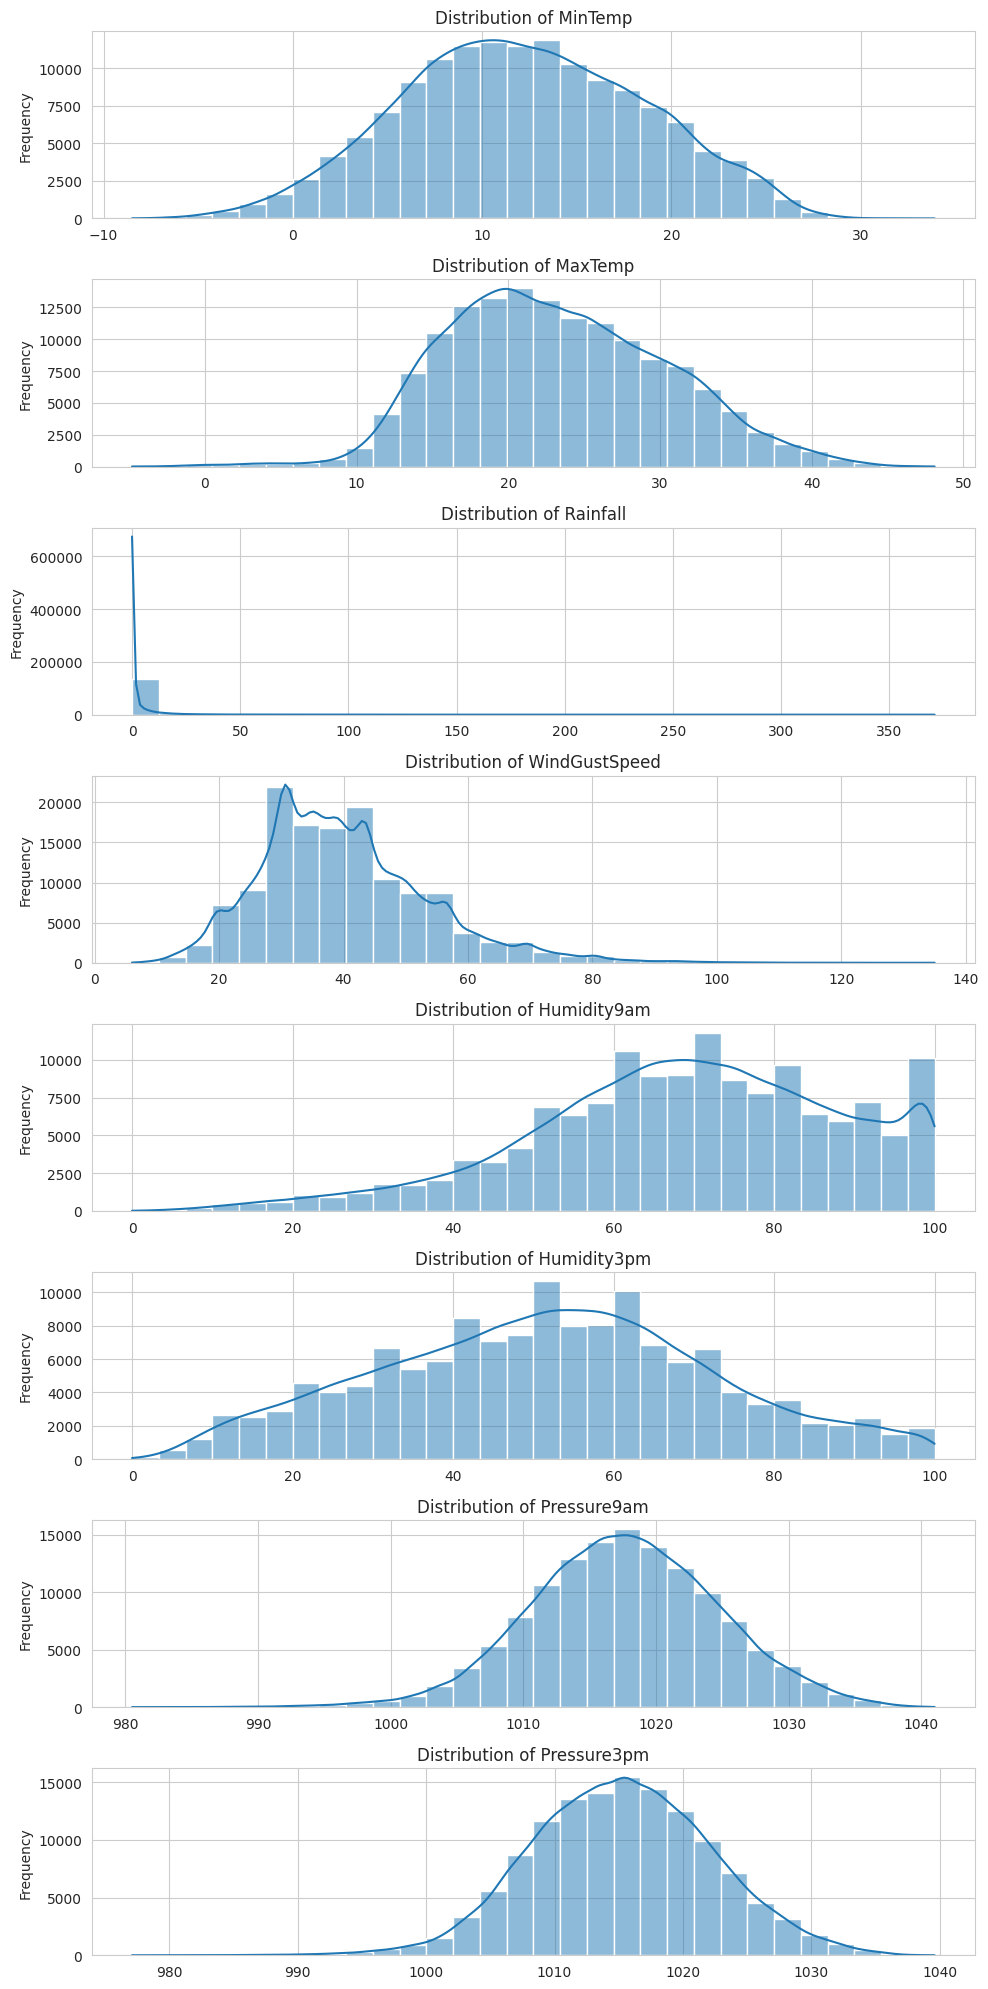

In [ ]:
key_variables = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']
fig, axes = plt.subplots(len(key_variables), 1, figsize=(10, 20))
for i, var in enumerate(key_variables):
    sns.histplot(weather_data[var], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

**Temperature Variables (MinTemp, MaxTemp)**: Both minimum and maximum temperatures are distributed in a somewhat normal manner, with a slight skew towards lower temperatures for MinTemp and higher temperatures for MaxTemp.

**Rainfall**: The distribution of rainfall is highly skewed to the right, indicating many days with little to no rainfall and a few days with very high rainfall.

**Wind Gust Speed**: This variable also shows a right-skewed distribution, suggesting that higher wind gust speeds are less common.

**Humidity (9am, 3pm)**: Humidity at 9 am and 3 pm shows a wide range of values, with a slight skew towards higher humidity levels.

**Pressure (9am, 3pm)**: Both morning and afternoon pressure readings show a somewhat normal distribution, with a central peak and symmetric tails.

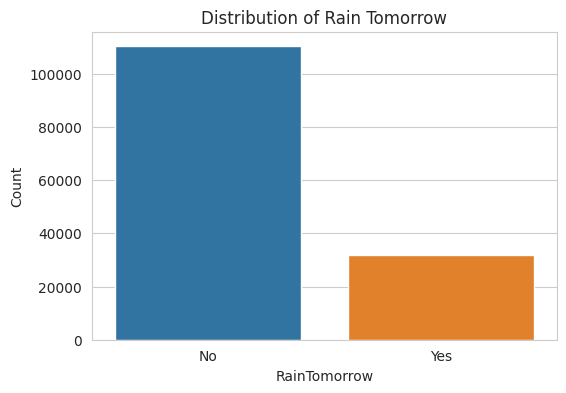

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='RainTomorrow', data=weather_data)
plt.title('Distribution of Rain Tomorrow')
plt.ylabel('Count')
plt.show()

This chart shows an imbalance with a higher count of 'No' (no rain) days compared to 'Yes' (rain) days.

In [ ]:
missing_values = weather_data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values_percentage = (missing_values / len(weather_data)) * 100

In [ ]:
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_summary

,Missing Values,Percentage
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


In [ ]:
categorical = [feature for feature in weather_data.columns if weather_data[feature].dtype=='O']
print(categorical)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
weather_data[categorical]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No


In [ ]:
weather_data[categorical].isna().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [ ]:
for feature in categorical:
    print(f'{feature} has {weather_data[feature].nunique()} unique labels\n')

Date has 3436 unique labels

Location has 49 unique labels

WindGustDir has 16 unique labels

WindDir9am has 16 unique labels

WindDir3pm has 16 unique labels

RainToday has 2 unique labels

RainTomorrow has 2 unique labels



In [ ]:
numerical = [feature for feature in weather_data.columns if weather_data[feature].dtype!='O']
print(numerical)
print(len(numerical))

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
16


In [ ]:
weather_data[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [ ]:
weather_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


MinTemp and MaxTemp: The minimum and maximum values for both MinTemp and MaxTemp are quite far from the 75% percentile, which could indicate outliers, but 33.9 and 48.1 could be normal temperature in real life

Rainfall: A maximum value of 371.0 is much higher than the 75% percentile of 0.8, which is a strong indication of outliers in rainfall data.

Evaporation: Similarly, the maximum evaporation value is very high compared to the 75% percentile, suggesting the presence of outliers.

WindGustSpeed: The maximum wind gust speed is quite high compared to the mean and 75% percentile, indicating possible outliers.

Pressure9am and Pressure3pm: The minimum values are significantly lower than the 25% percentile, which could be outliers, although pressure readings are generally less variable and these could be due to natural fluctuations.

Cloud9am and Cloud3pm: The cloud cover data might have outliers since the maximum values are only 9.0, which is peculiar if the scale is assumed to be out of 10 (assuming cloud cover is rated on a scale where 10 represents overcast conditions), yet the data distribution might not be standard given the mean and percentiles.

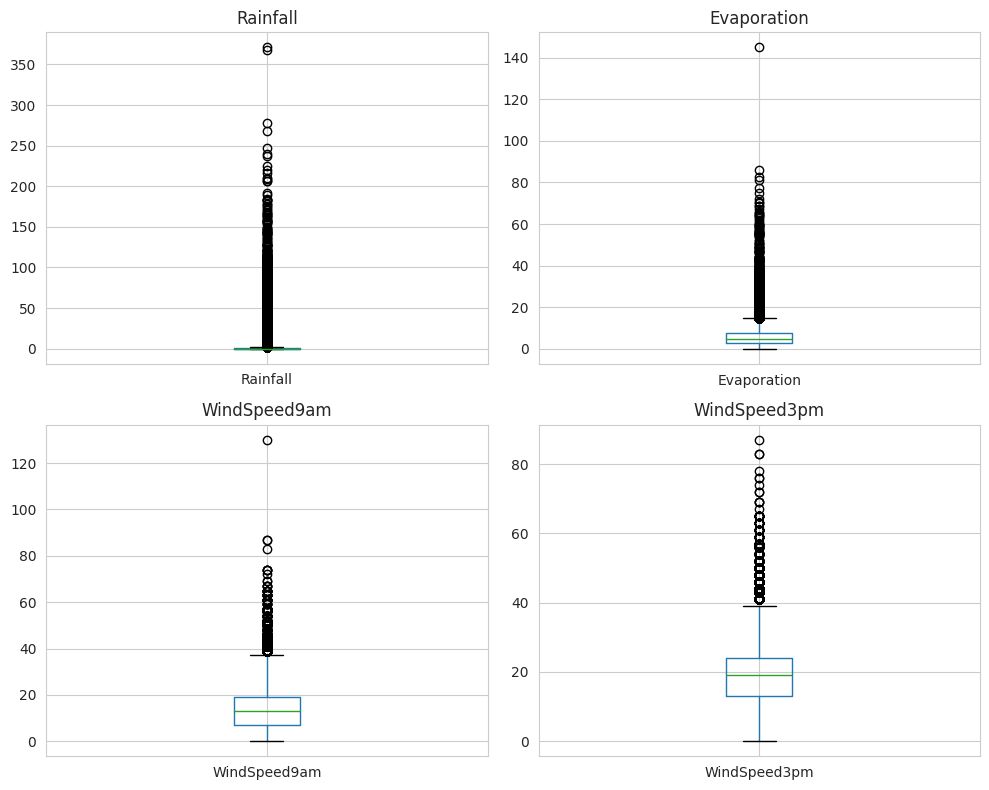

In [ ]:
plt.figure(figsize=(10, 8))
columns_to_check = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    weather_data.boxplot(column)
    plt.title(column)

plt.tight_layout()
plt.show()

Potential outliers above)

In [ ]:
outliers = {}
for column in columns_to_check:
    Q1 = weather_data[column].quantile(0.25)
    Q3 = weather_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = weather_data[(weather_data[column] < lower_bound) | (weather_data[column] > upper_bound)]

In [ ]:
outliers

{'Rainfall':               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
 11      2008-12-12   Albury     15.9     21.7       2.2          NaN   
 12      2008-12-13   Albury     15.9     18.6      15.6          NaN   
 13      2008-12-14   Albury     12.6     21.0       3.6          NaN   
 17      2008-12-18   Albury     13.5     22.9      16.8          NaN   
 18      2008-12-19   Albury     11.2     22.5      10.6          NaN   
 ...            ...      ...      ...      ...       ...          ...   
 145325  2017-02-11    Uluru     22.2     39.4       6.2          NaN   
 145391  2017-04-18    Uluru     15.2     21.5       6.8          NaN   
 145392  2017-04-19    Uluru     17.7     26.9      12.6          NaN   
 145393  2017-04-20    Uluru     18.6     28.6      34.6          NaN   
 145394  2017-04-21    Uluru     18.1     29.6       3.8          NaN   
 
         Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
 11           NaN         NNE     

Ok, its some NaNs

## Multivariate Analysis

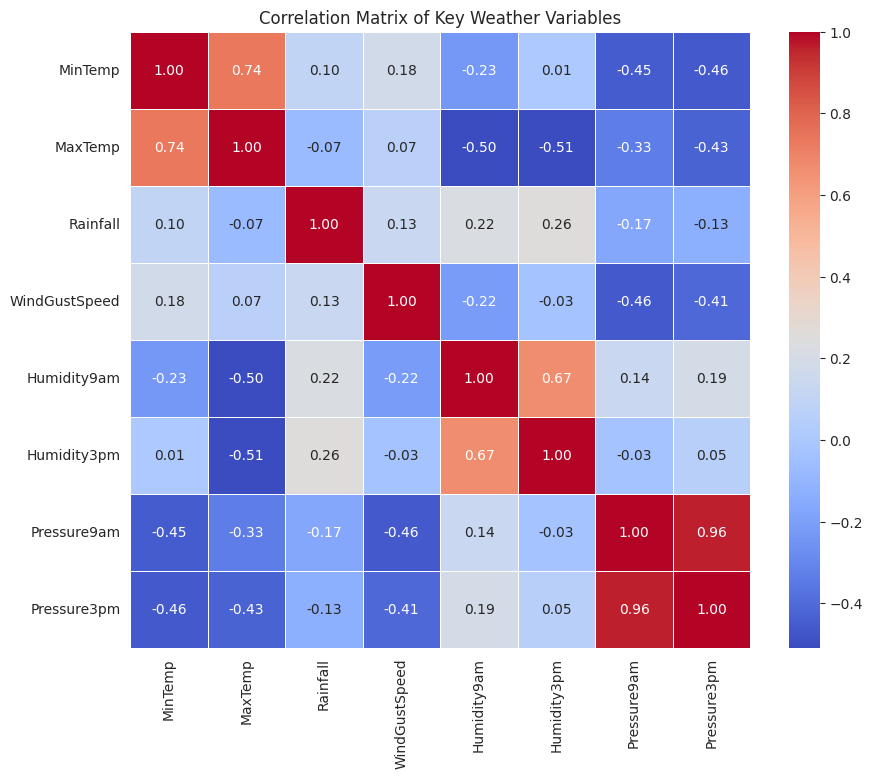

In [ ]:
correlation_matrix = weather_data[key_variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Key Weather Variables')
plt.show()

**MinTemp and MaxTemp** have a high positive correlation (0.74), suggesting that days with higher minimum temperatures also tend to have higher maximum temperatures.

**Pressure9am and Pressure3pm** are highly positively correlated (0.96), which is expected as atmospheric pressure is likely to be similar within a single day.

**Humidity9am and MaxTemp** have a moderately negative correlation (-0.50), indicating that higher temperatures may be associated with lower humidity levels in the morning.

In [ ]:
weather_data_numeric = weather_data.copy()
weather_data_numeric['RainTomorrow'] = weather_data['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

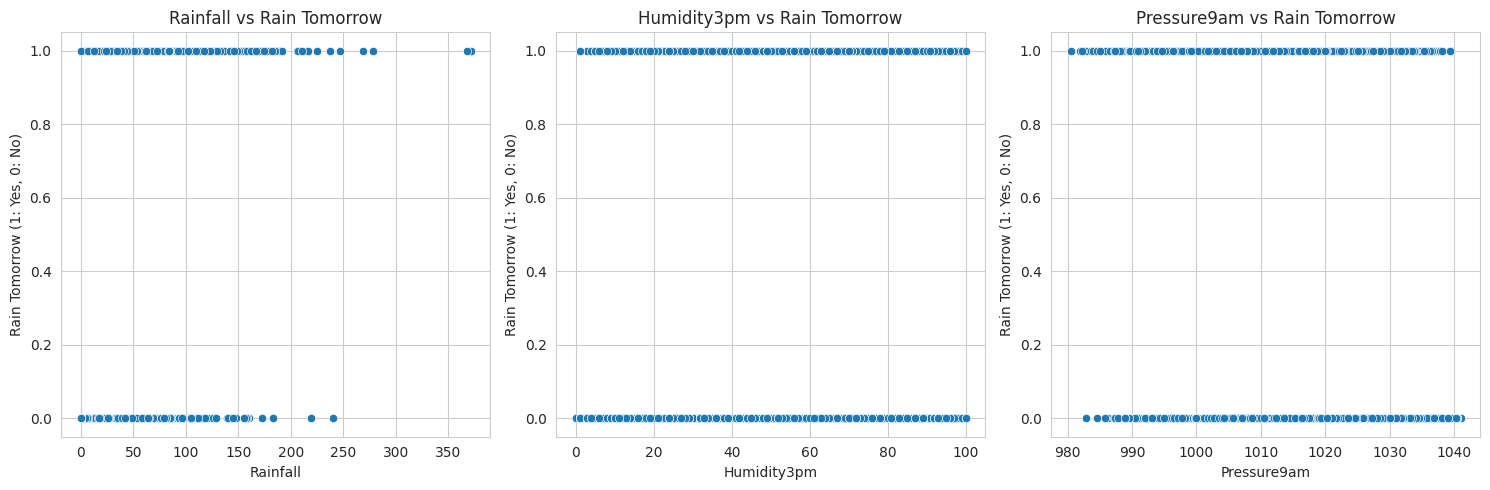

In [ ]:
selected_variables = ['Rainfall', 'Humidity3pm', 'Pressure9am']
fig, axes = plt.subplots(1, len(selected_variables), figsize=(15, 5))

for i, var in enumerate(selected_variables):
    sns.scatterplot(data=weather_data_numeric, x=var, y='RainTomorrow', ax=axes[i])
    axes[i].set_title(f'{var} vs Rain Tomorrow')
    axes[i].set_ylabel('Rain Tomorrow (1: Yes, 0: No)')

plt.tight_layout()
plt.show()

**Rainfall vs. Rain Tomorrow**: Higher rainfall values seem to have a stronger association with rain occurring the next day. However, there are many days with little to no rainfall where it still rained the next day.

**Humidity3pm vs. Rain Tomorrow**: Higher humidity levels in the afternoon appear to be more associated with rain the next day.

**Pressure9am vs. Rain Tomorrow**: The scatter plot doesn't show a clear pattern between morning pressure and rain on the next day.

## Summary:
We have 16 numerical attributes, 7 categorical. 4 labels with potential outliers, imbalanced data which should be handled, some variables with strong correlation. Also we have a lot of missing values (max 48%), such columns should be handled and >30% will be dropped. Lets continue with Data Prep part

# 2. Data Preparation

In [ ]:
missing_values = weather_data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values_percentage = (missing_values / len(weather_data)) * 100

In [ ]:
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_summary

,Missing Values,Percentage
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


**High Percentage of Missing Data**: Columns like 'Sunshine', 'Evaporation', 'Cloud3pm', and 'Cloud9am' have over 38% missing values, with 'Sunshine' being the highest at around 48%.

**Moderate to Low Missing Data**: Other columns like 'Pressure9am', 'Pressure3pm', 'WindGustSpeed', and various wind direction and humidity measures have fewer missing values.

In [ ]:
weather_data['Date'] = pd.to_datetime(weather_data['Date'])
weather_data['Year'] = weather_data['Date'].dt.year
weather_data['Month'] = weather_data['Date'].dt.month
weather_data['Day'] = weather_data['Date'].dt.day
weather_data = weather_data.drop('Date', axis=1)

Ok, I will drop all the date variables because:
Vera Kochetkova
As I see further, you don't consider date and time columns. Even if it's not TimeSeries module yet, it would be good to look at features on timeline.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
weather_data_cleaned = weather_data.dropna(subset=['RainTomorrow'])

In [ ]:
columns_to_drop = missing_summary[missing_summary['Percentage'] > 30].index.tolist()
columns_to_drop
weather_data_cleaned = weather_data_cleaned.drop(columns=columns_to_drop)

In [ ]:
numeric_cols = weather_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
numeric_imputer = SimpleImputer(strategy='median')
weather_data_cleaned[numeric_cols] = numeric_imputer.fit_transform(weather_data_cleaned[numeric_cols])

In [ ]:
categorical_cols = weather_data_cleaned.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
weather_data_cleaned[categorical_cols] = categorical_imputer.fit_transform(weather_data_cleaned[categorical_cols])

In [ ]:
columns_to_drop

['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']

In [ ]:
weather_data_cleaned = weather_data_cleaned.drop(['Year','Month','Day'], axis=1)

In [ ]:
weather_data_cleaned.T

,0,1,2,3,4,5,6,7,8,9,...,145449,145450,145451,145452,145453,145454,145455,145456,145457,145458
Location,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,Albury,...,Uluru,Uluru,Uluru,Uluru,Uluru,Uluru,Uluru,Uluru,Uluru,Uluru
MinTemp,13.4,7.4,12.9,9.2,17.5,14.6,14.3,7.7,9.7,13.1,...,2.6,5.2,6.4,8.0,7.4,3.5,2.8,3.6,5.4,7.8
MaxTemp,22.9,25.1,25.7,28.0,32.3,29.7,25.0,26.7,31.9,30.1,...,22.5,24.3,23.4,20.7,20.6,21.8,23.4,25.3,26.9,27.0
Rainfall,0.6,0.0,0.0,0.0,1.0,0.2,0.0,0.0,0.0,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WindGustDir,W,WNW,WSW,NE,W,WNW,W,W,NNW,W,...,S,E,ESE,ESE,E,E,E,NNW,N,SE
WindGustSpeed,44.0,44.0,46.0,24.0,41.0,56.0,50.0,35.0,80.0,28.0,...,19.0,24.0,31.0,41.0,35.0,31.0,31.0,22.0,37.0,28.0
WindDir9am,W,NNW,W,SE,ENE,W,SW,SSE,SE,S,...,S,SE,S,SE,ESE,ESE,SE,SE,SE,SSE
WindDir3pm,WNW,WSW,WSW,E,NW,W,W,W,NW,SSE,...,E,E,ESE,E,E,E,ENE,N,WNW,N
WindSpeed9am,20.0,4.0,19.0,11.0,7.0,19.0,20.0,6.0,7.0,15.0,...,9.0,11.0,15.0,19.0,15.0,15.0,13.0,13.0,9.0,13.0
WindSpeed3pm,24.0,22.0,26.0,9.0,20.0,24.0,24.0,17.0,28.0,11.0,...,7.0,11.0,17.0,26.0,17.0,13.0,11.0,9.0,9.0,7.0


In [ ]:
weather_data_cleaned[categorical_cols]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
145454,Uluru,E,ESE,E,No,No
145455,Uluru,E,SE,ENE,No,No
145456,Uluru,NNW,SE,N,No,No
145457,Uluru,N,SE,WNW,No,No


In [ ]:
weather_data_cleaned.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
weather_data_cleaned.shape

(142193, 18)

In [ ]:
weather_data_cleaned['RainTomorrow'] = weather_data_cleaned['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
weather_data_cleaned.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,0
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
X = weather_data_cleaned.drop('RainTomorrow', axis=1)
y = weather_data_cleaned['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

X_train_numeric = X_train[numeric_features]
X_train_categorical = X_train[categorical_features]

In [ ]:
smote = SMOTE(random_state=42)
X_train_numeric_smote, y_train_smote = smote.fit_resample(X_train_numeric, y_train)

In [ ]:
X_train_smote = pd.concat([pd.DataFrame(X_train_numeric_smote, columns=numeric_features), X_train_categorical.reset_index(drop=True)], axis=1)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train_smote)
X_test = preprocessor.transform(X_test)

# Metrics chosen as well as reasoning behind each metric (5%);

***We will continie with such metrics***:

**Accuracy**: This is the most straightforward metric showing the proportion of correctly predicted instances. Its good but not always reliable, when datasets are imbalanced.

**Precision and Recall**: These metrics are crucial when dealing with imbalanced classes. Precision measures the proportion of true positives among all positive predictions, while recall measures the proportion of true positives that were correctly identified by the model.

For predicting rain, recall might be more important as missing rain day could have more significant consequences than falsely predicting rain.

**F1 Score**: This is the harmonic mean of precision and recall. It is useful when we need to balance precision and recall, which is often the case in imbalanced datasets.

**ROC-AUC**: The ROC curve and the area under the curve are used to measure the performance of a classifier. Higher AUC better model performance.Useful for evaluating the models ability to distinguish between the classes.

# Modeling

## a) Logistic Regression

### Training the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
logreg = LogisticRegression(max_iter=1000)

In [ ]:
logreg.fit(X_train, y_train_smote)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90     22098
           1       0.72      0.49      0.59      6341

    accuracy                           0.84     28439
   macro avg       0.79      0.72      0.74     28439
weighted avg       0.83      0.84      0.83     28439



In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Confusion Matrix:
 [[20883  1215]
 [ 3214  3127]]
ROC AUC Score: 0.7190787659775756


**Precision and Recall**:

For class 0 (No Rain):
Precision: 87% - When the model predicts no rain, it is correct 87% of the time.
Recall: 95% - The model correctly identifies 95% of all no rain instances.

For class 1 (Rain):
Precision: 72% - When the model predicts rain, it is correct 72% of the time.
Recall: 49% - The model correctly identifies 49% of all rain instances.

**F1-Score**:

The F1-score for class 0 is 0.90, indicating a good balance between precision and recall for no-rain predictions.
For class 1, the F1-score is 0.59, which is lower, reflecting the imbalance between precision and recall in predicting rain.

**ROC AUC Score:**
The ROC AUC Score is 0.719, which is above 0.5 (better than random chance) but still indicates room for improvement.



### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

In [ ]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train_smote)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


### Retrain the Logistic Regression Model with Best Parameters

In [ ]:
best_params = grid_search.best_params_

In [ ]:
logreg_optimized = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], max_iter=1000)
logreg_optimized.fit(X_train, y_train_smote)

LogisticRegression(C=10, max_iter=1000)

In [ ]:
y_pred_optimized = logreg_optimized.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_optimized))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimized))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90     22098
           1       0.72      0.49      0.59      6341

    accuracy                           0.84     28439
   macro avg       0.79      0.72      0.75     28439
weighted avg       0.83      0.84      0.83     28439

Confusion Matrix:
 [[20885  1213]
 [ 3212  3129]]
ROC AUC Score: 0.7192817227738479


Similar Performance Metrics: Both models have nearly identical performance metrics across precision, recall, f1-score, and accuracy. This similarity suggests that the hyperparameter tuning did not significantly change the model's ability to generalize to the test data.

Confusion Matrix: The confusion matrices of both models are almost the same, with a slight difference in the true positives and false negatives. The optimized model has marginally better performance in correctly predicting the minority class ('Yes' for rain).

ROC AUC Score: The ROC AUC score shows a very slight improvement in the optimized model (0.7193 compared to 0.7191 in the initial model). While this is an improvement, it's very marginal and might not be significant in practical terms.

Overall Assessment: The optimization process did not lead to substantial improvements. This outcome could mean that the model is already performing near its capacity with the given features and data, or it could indicate that other aspects of the model or data, such as feature engineering or different model types, need to be explored for significant performance gains.

###  Interpreting Coefficients and Feature Importance Plotting

In [ ]:
feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_names.extend(numeric_features)

In [ ]:
coefficients = grid_search.best_estimator_.coef_[0]

In [ ]:
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [ ]:
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

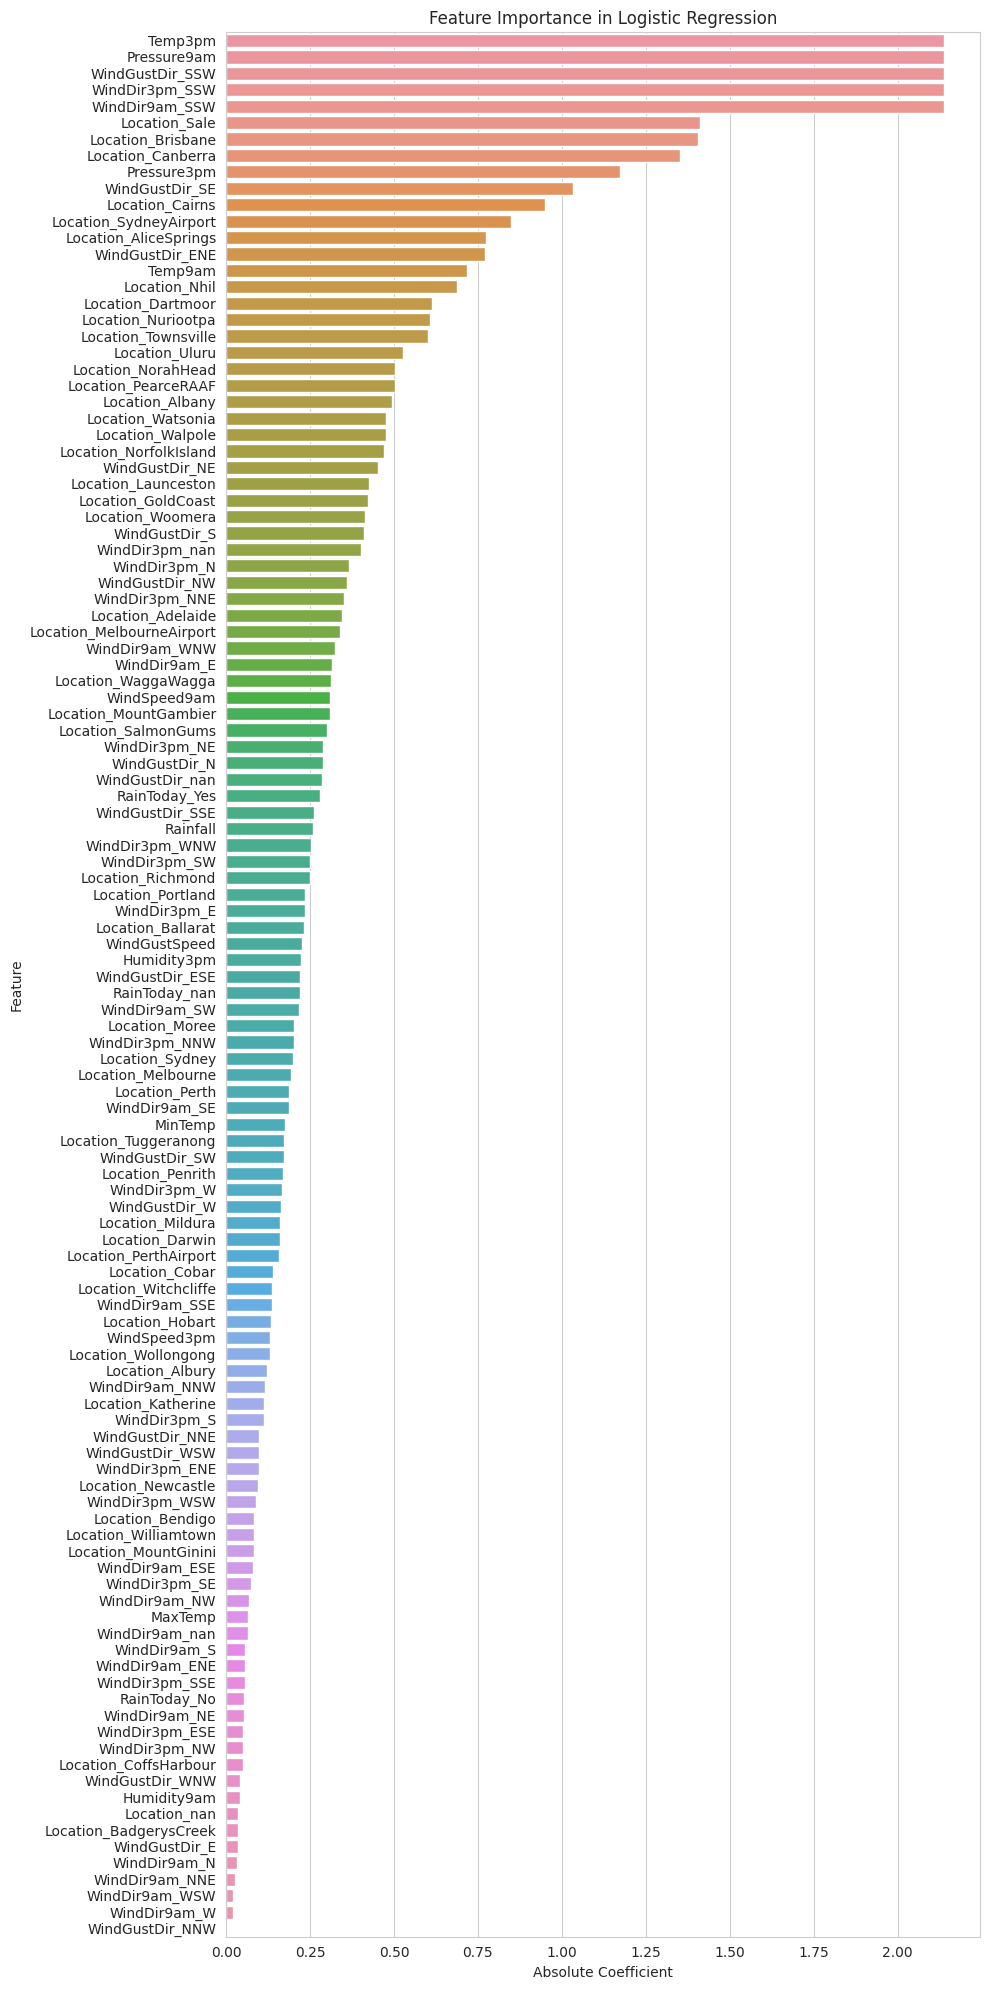

In [ ]:
plt.figure(figsize=(10, 20))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Threshold Analysis

In [ ]:
from sklearn.metrics import precision_recall_curve


In [ ]:
y_scores = logreg.predict_proba(X_test)[:, 1]


In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

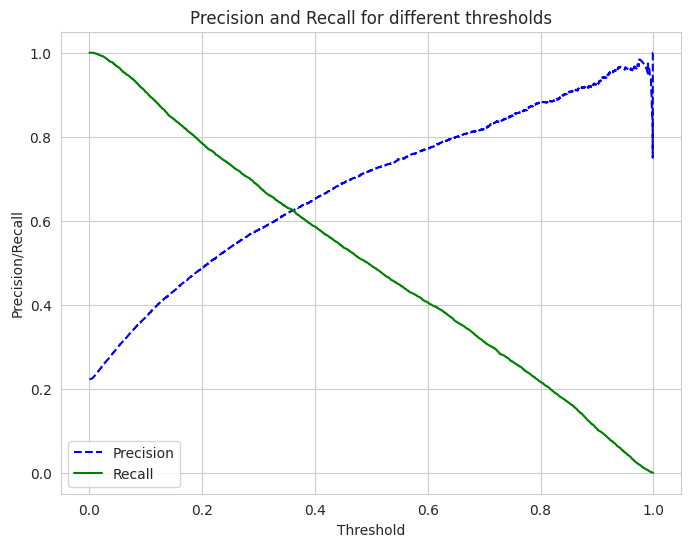

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision and Recall for different thresholds')
plt.legend()
plt.show()

The plot shows the trade-off between precision and recall at various thresholds. Precision declines as the threshold increases, while recall increases, indicating that as we become more conservative about predicting the positive class, we lose precision but gain recall. The optimal threshold should be chosen based on the desired balance between these two metrics.
The intersection point on the plot suggests a balance between precision and recall, which could be considered as an optimal threshold if equal importance is given to both metrics. It is the point where the model achieves a good balance between correctly predicting the positive class and minimizing false positives.

In [ ]:
y_probs_logreg_optimized = logreg_optimized.predict_proba(X_test)[:, 1]

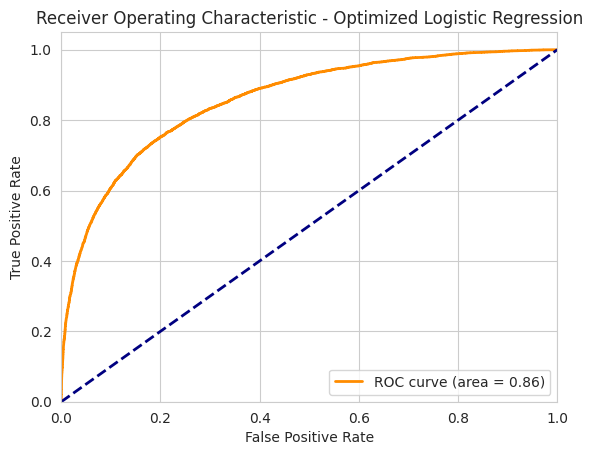

In [ ]:
fpr_logreg_optimized, tpr_logreg_optimized, thresholds_logreg_optimized = roc_curve(y_test, y_probs_logreg_optimized)
roc_auc_logreg_optimized = auc(fpr_logreg_optimized, tpr_logreg_optimized)

plt.figure()
plt.plot(fpr_logreg_optimized, tpr_logreg_optimized, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc_logreg_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Optimized Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## b) K-Nearest Neighbors (KNN)

### Training the KNN Model applying TruncatedSVD for Dimensionality Reduction

K-Nearest Neighbors (KNN) takes a long time to make predictions, so I decided to use Dimensionality Reduction

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_auc_score

In [ ]:
svd = TruncatedSVD(n_components=100)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

In [ ]:
knn_svd = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

In [ ]:
knn_svd.fit(X_train_svd, y_train_smote)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [ ]:
y_pred_optimized_knn_svd = knn_svd.predict(X_test_svd)

In [ ]:
print(classification_report(y_test, y_pred_optimized_knn_svd))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimized_knn_svd))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_optimized_knn_svd))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     22098
           1       0.64      0.47      0.54      6341

    accuracy                           0.82     28439
   macro avg       0.75      0.70      0.72     28439
weighted avg       0.81      0.82      0.81     28439

Confusion Matrix:
 [[20443  1655]
 [ 3349  2992]]
ROC AUC Score: 0.6984781052086525


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
subset_indices = np.random.choice(X_train.shape[0], size=int(0.1 * X_train.shape[0]), replace=False)
X_train_subset = X_train[subset_indices]
y_train_subset_smote = y_train_smote[subset_indices]

In [ ]:
param_dist_knn = {'knn__n_neighbors': np.arange(1, 51)}

In [ ]:
pipeline = Pipeline([
    ('svd', TruncatedSVD(n_components=100)),
    ('knn', KNeighborsClassifier(n_jobs=-1))
])

In [ ]:
random_search_knn = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist_knn,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    random_state=42,
    verbose=1
)

In [ ]:
random_search_knn.fit(X_train_subset, y_train_subset_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('svd',
                                              TruncatedSVD(n_components=100)),
                                             ('knn',
                                              KNeighborsClassifier(n_jobs=-1))]),
                   param_distributions={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
best_k_svd = random_search_knn.best_params_['knn__n_neighbors']
best_score_svd = random_search_knn.best_score_

In [ ]:
print("Best number of neighbors:", best_k_svd)
print("Best cross-validation score:", best_score_svd)

Best number of neighbors: 49
Best cross-validation score: 0.8952559088590375


### Retraining with Best Parameters

In [ ]:
best_knn_svd = KNeighborsClassifier(n_neighbors=best_k_svd, n_jobs=-1)

In [ ]:
svd = TruncatedSVD(n_components=100)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

In [ ]:
best_knn_svd.fit(X_train_svd, y_train_smote)

KNeighborsClassifier(n_jobs=-1, n_neighbors=49)

In [ ]:
y_pred_best_knn = best_knn_svd.predict(X_test_svd)

In [ ]:
print(classification_report(y_test, y_pred_best_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_knn))
roc_auc = roc_auc_score(y_test, best_knn_svd.predict_proba(X_test_svd)[:, 1])
print("ROC AUC Score:", roc_auc)

              precision    recall  f1-score   support

           0       0.85      0.97      0.90     22098
           1       0.78      0.40      0.53      6341

    accuracy                           0.84     28439
   macro avg       0.81      0.69      0.72     28439
weighted avg       0.83      0.84      0.82     28439

Confusion Matrix:
 [[21358   740]
 [ 3779  2562]]
ROC AUC Score: 0.8646487912534363


### Demonstrating Impact of Different k Values

In [ ]:
k_values = np.arange(max(1, best_k_svd - 10), min(X_train.shape[1], best_k_svd + 11))
scores = []

In [ ]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train_svd, y_train_smote)
    scores.append(knn.score(X_test_svd, y_test))

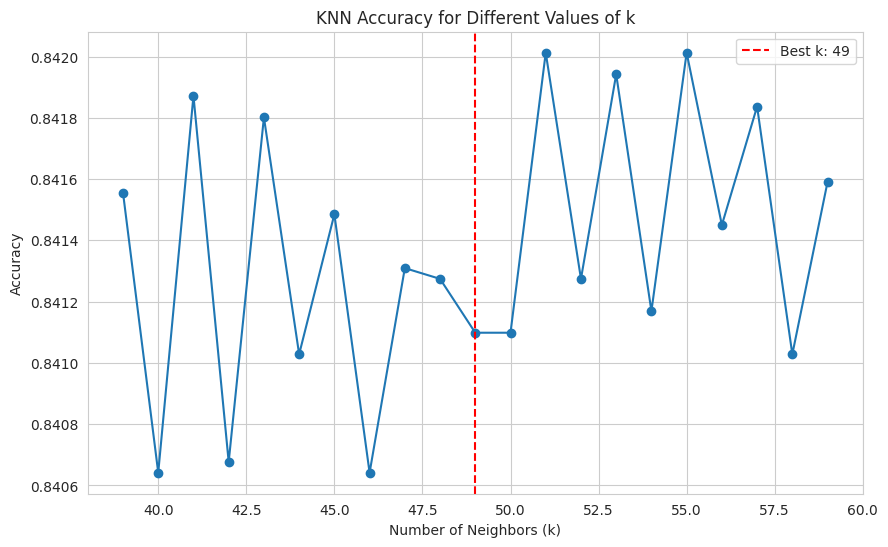

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Values of k')
plt.axvline(x=best_k_svd, color='red', linestyle='--', label=f'Best k: {best_k_svd}')
plt.legend()
plt.show()

I guess 49 here it is not best due to RandomSearchCV, I used it because it is much faster

In [ ]:
y_probs = best_knn_svd.predict_proba(X_test_svd)

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

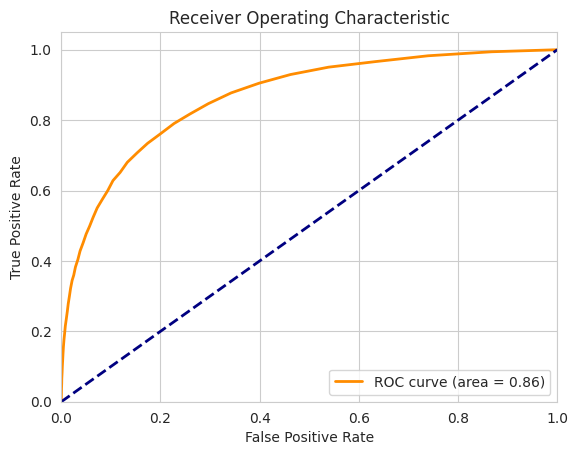

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

##c) Naive Bayes

### Training the Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train_naive = X_train.toarray()

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_naive, y_train_smote)

GaussianNB()

In [ ]:
y_pred_nb = naive_bayes.predict(X_test.toarray())

In [ ]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_classification_report = classification_report(y_test, y_pred_nb)
nb_confusion_matrix = confusion_matrix(y_test, y_pred_nb)
nb_roc_auc_score = roc_auc_score(y_test, y_pred_nb)

print("Naive Bayes model evaluation:")
print("Accuracy:", nb_accuracy)
print("Classification Report:\n", nb_classification_report)
print("Confusion Matrix:\n", nb_confusion_matrix)
print("ROC AUC Score:", nb_roc_auc_score)

Naive Bayes model evaluation:
Accuracy: 0.7776644748408875
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.87     22098
           1       0.66      0.01      0.01      6341

    accuracy                           0.78     28439
   macro avg       0.72      0.50      0.44     28439
weighted avg       0.75      0.78      0.68     28439

Confusion Matrix:
 [[22079    19]
 [ 6304    37]]
ROC AUC Score: 0.5024876177371009


### Hyperparameters tuning

In [ ]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search_nb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=5, scoring='accuracy', verbose=1)
grid_search_nb.fit(X_train_naive, y_train_smote)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best Parameters for Naive Bayes:", grid_search_nb.best_params_)

Best Parameters for Naive Bayes: {'var_smoothing': 1.0}


### Retrain with the best 'var_smoothing' parameter

In [ ]:
best_var_smoothing = grid_search_nb.best_params_['var_smoothing']
naive_bayes_optimized = GaussianNB(var_smoothing=best_var_smoothing)
naive_bayes_optimized.fit(X_train_naive, y_train_smote)

GaussianNB(var_smoothing=1.0)

In [ ]:
y_pred_nb_optimized = naive_bayes_optimized.predict(X_test.toarray())

In [ ]:
nb_optimized_accuracy = accuracy_score(y_test, y_pred_nb_optimized)
nb_optimized_classification_report = classification_report(y_test, y_pred_nb_optimized)
nb_optimized_confusion_matrix = confusion_matrix(y_test, y_pred_nb_optimized)
nb_optimized_roc_auc_score = roc_auc_score(y_test, y_pred_nb_optimized)

print("Optimized Naive Bayes model evaluation:")
print("Accuracy:", nb_optimized_accuracy)
print("Classification Report:\n", nb_optimized_classification_report)
print("Confusion Matrix:\n", nb_optimized_confusion_matrix)
print("ROC AUC Score:", nb_optimized_roc_auc_score)

Optimized Naive Bayes model evaluation:
Accuracy: 0.8152185379232744
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88     22098
           1       0.61      0.48      0.54      6341

    accuracy                           0.82     28439
   macro avg       0.73      0.70      0.71     28439
weighted avg       0.80      0.82      0.81     28439

Confusion Matrix:
 [[20116  1982]
 [ 3273  3068]]
ROC AUC Score: 0.6970719912070659


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, naive_bayes.predict_proba(X_test.toarray())[:,1])

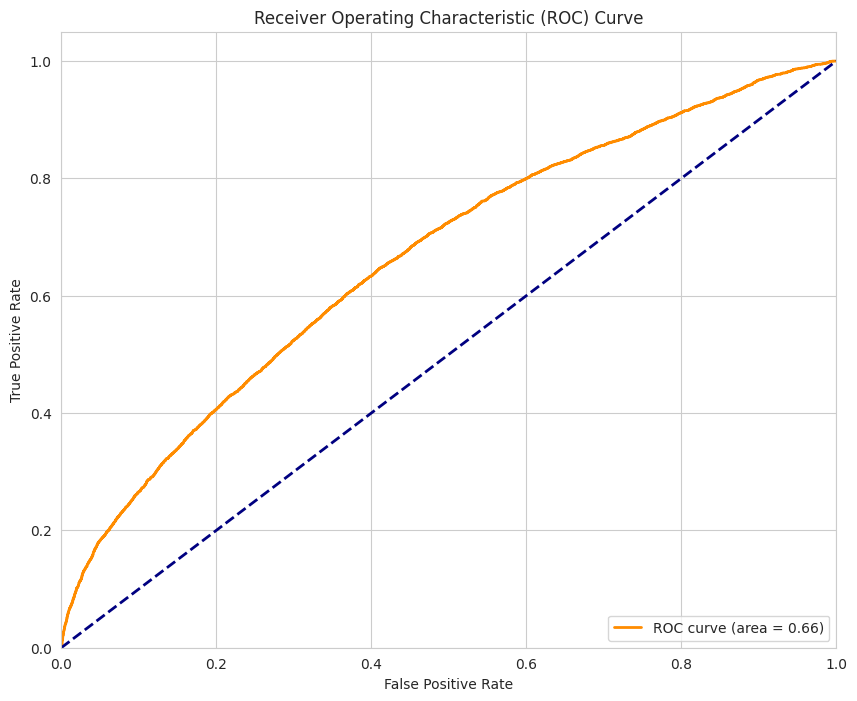

In [ ]:
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## d) SVM

### Training the SVM

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
sgd_svm = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)
calibrated_sgd_svm = CalibratedClassifierCV(sgd_svm)
calibrated_sgd_svm.fit(X_train, y_train_smote)

CalibratedClassifierCV(estimator=SGDClassifier(random_state=42))

In [ ]:
y_pred_sgd_svm = calibrated_sgd_svm.predict(X_test)

In [ ]:
sgd_svm_accuracy = accuracy_score(y_test, y_pred_sgd_svm)
sgd_svm_classification_report = classification_report(y_test, y_pred_sgd_svm)
sgd_svm_confusion_matrix = confusion_matrix(y_test, y_pred_sgd_svm)
sgd_svm_roc_auc_score = roc_auc_score(y_test, calibrated_sgd_svm.predict_proba(X_test)[:,1])

print("SGD SVM model evaluation:")
print("Accuracy:", sgd_svm_accuracy)
print("Classification Report:\n", sgd_svm_classification_report)
print("Confusion Matrix:\n", sgd_svm_confusion_matrix)
print("ROC AUC Score:", sgd_svm_roc_auc_score)

SGD SVM model evaluation:
Accuracy: 0.8198952143183657
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     22098
           1       0.87      0.23      0.36      6341

    accuracy                           0.82     28439
   macro avg       0.84      0.61      0.63     28439
weighted avg       0.83      0.82      0.78     28439

Confusion Matrix:
 [[21890   208]
 [ 4914  1427]]
ROC AUC Score: 0.8498466401954311


### Hyperparameter tuning

In [ ]:
param_grid_sgd = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 1]
}

In [ ]:
grid_search_sgd = GridSearchCV(SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42),
                               param_grid=param_grid_sgd,
                               cv=5,
                               scoring='accuracy',
                               verbose=1)
grid_search_sgd.fit(X_train, y_train_smote)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'eta0': [0.01, 0.1, 1],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best Parameters for SGD SVM:", grid_search_sgd.best_params_)

Best Parameters for SGD SVM: {'alpha': 0.001, 'eta0': 1, 'learning_rate': 'constant', 'penalty': 'elasticnet'}


### Retrain with the best parameters

In [ ]:
best_params_sgd = grid_search_sgd.best_params_
sgd_svm_optimized = SGDClassifier(loss='hinge',
                                  alpha=best_params_sgd['alpha'],
                                  penalty=best_params_sgd['penalty'],
                                  learning_rate=best_params_sgd['learning_rate'],
                                  eta0=best_params_sgd.get('eta0', 0.01),
                                  max_iter=1000,
                                  tol=1e-3,
                                  random_state=42)
calibrated_sgd_svm_optimized = CalibratedClassifierCV(sgd_svm_optimized)
calibrated_sgd_svm_optimized.fit(X_train, y_train_smote)

CalibratedClassifierCV(estimator=SGDClassifier(alpha=0.001, eta0=1,
                                               learning_rate='constant',
                                               penalty='elasticnet',
                                               random_state=42))

In [ ]:
y_pred_sgd_svm_optimized = calibrated_sgd_svm_optimized.predict(X_test)

In [ ]:
sgd_svm_optimized_accuracy = accuracy_score(y_test, y_pred_sgd_svm_optimized)
sgd_svm_optimized_classification_report = classification_report(y_test, y_pred_sgd_svm_optimized)
sgd_svm_optimized_confusion_matrix = confusion_matrix(y_test, y_pred_sgd_svm_optimized)
sgd_svm_optimized_roc_auc_score = roc_auc_score(y_test, calibrated_sgd_svm_optimized.predict_proba(X_test)[:,1])

print("Optimized SGD SVM model evaluation:")
print("Accuracy:", sgd_svm_optimized_accuracy)
print("Classification Report:\n", sgd_svm_optimized_classification_report)
print("Confusion Matrix:\n", sgd_svm_optimized_confusion_matrix)
print("ROC AUC Score:", sgd_svm_optimized_roc_auc_score)

Optimized SGD SVM model evaluation:
Accuracy: 0.8268926474207954
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90     22098
           1       0.81      0.29      0.43      6341

    accuracy                           0.83     28439
   macro avg       0.82      0.64      0.66     28439
weighted avg       0.82      0.83      0.79     28439

Confusion Matrix:
 [[21657   441]
 [ 4482  1859]]
ROC AUC Score: 0.8395132639427907


In [ ]:
y_proba_sgd_svm_optimized = calibrated_sgd_svm_optimized.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_sgd_svm_optimized)

roc_auc = auc(fpr, tpr)

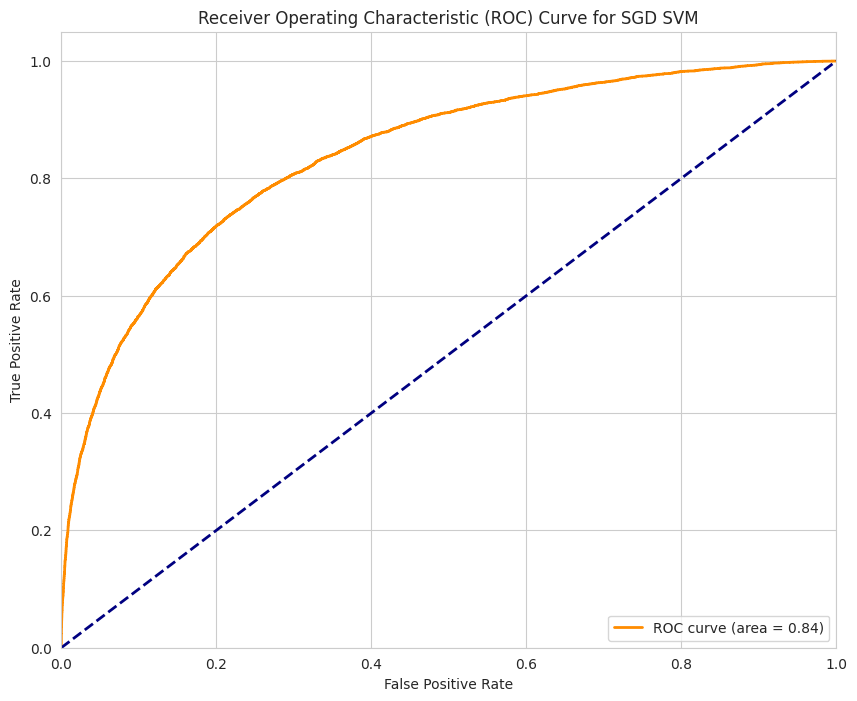

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SGD SVM')
plt.legend(loc="lower right")
plt.show()

## X Model vs Y Model (Comparison Across Different Models):

### Logistic Regression vs KNN:

Before Optimization: Logistic Regression generally outperforms KNN in terms of precision, recall, and f1-score for predicting rain (class 1). Logistic Regression has a higher ROC AUC score, suggesting better overall capability in distinguishing between the classes.

After Optimization: Both models show an improvement in ROC AUC scores, with KNN showing a significant improvement. However, Logistic Regression maintains a slight edge in accuracy and f1-score for the positive class.

### Logistic Regression vs Naive Bayes:

Before Optimization: Logistic Regression significantly outperforms Naive Bayes in all metrics, particularly in recall and f1-score for the rain prediction. Naive Bayes has a very low recall and f1-score for class 1, which is critical for rain prediction.

After Optimization: Naive Bayes sees substantial improvement in recall and f1-score for predicting rain, but Logistic Regression still has better performance metrics overall.

### Logistic Regression vs SVM:

Before Optimization: SVM has a higher precision for predicting rain but a much lower recall and f1-score compared to Logistic Regression. The ROC AUC score is higher for SVM, indicating better separation of classes overall.

After Optimization: The SVM’s precision for predicting rain remains high, and the recall sees some improvement. However, Logistic Regression continues to provide a better balance between precision and recall for class 1.

### KNN vs Naive Bayes:

Before Optimization: KNN outperforms Naive Bayes in precision, recall, and f1-score for class 1. Naive Bayes shows very low performance in class 1 prediction.

After Optimization: Naive Bayes shows improvement and becomes more competitive with KNN, though KNN still has a higher f1-score for class 1 and a significantly higher ROC AUC score.

### KNN vs SVM:

Before Optimization: SVM outperforms KNN in precision for class 1 but has a lower recall and f1-score. SVM has a significantly higher ROC AUC score, suggesting better overall model performance.

After Optimization: The optimized SVM shows a decrease in ROC AUC compared to the non-optimized model but remains higher than KNN. The f1-score for class 1 is closer between the two models after optimization.

### Naive Bayes vs SVM:

Before Optimization: SVM outperforms Naive Bayes in all metrics except recall, where Naive Bayes has a negligible advantage for class 1. SVM has a much higher ROC AUC score.

After Optimization: Both models see an improvement in their ROC AUC scores, but SVM retains a higher score. SVM has a better balance of precision and recall for class 1 than Naive Bayes.

## X Model vs Modified X Model (Comparison Before and After Optimization):

### Logistic Regression:

There is negligible difference in performance metrics before and after optimization. This indicates that the Logistic Regression model is quite robust and the hyperparameter tuning had minimal impact on performance.

### KNN:

Optimization results in a significant increase in ROC AUC score, though precision for class 1 increases at the cost of recall, suggesting the model becomes more conservative in predicting rain.

### Naive Bayes:

There is a notable improvement in all performance metrics after optimization, especially in recall and f1-score for class 1, which are crucial for a balanced prediction in an imbalanced dataset.Новый раздел

### SVM:

The optimized model shows a slight decrease in ROC AUC score but improves in recall and f1-score for class 1. The precision remains high, indicating the model becomes slightly less conservative but maintains its ability to correctly label the positive class.

# Conclusion
Overall Model Performance: Before optimization, SVM stands out with the highest ROC AUC score, suggesting it's the best model for class separation. After optimization, KNN shows the most significant improvement in ROC AUC, making it competitive.

Improvement Through Optimization: Naive Bayes benefits the most from hyperparameter tuning, with significant gains in recall and f1-score for class 1, though it does not outperform other models.

Predicting Rain (Class 1): Logistic Regression provides the most balanced performance for predicting rain, with decent scores across precision, recall, and f1-score, both before and after optimization.

Trade-offs: Each model presents trade-offs. KNN and SVM tend to favor precision over recall, potentially missing some positive instances. Naive Bayes, with its substantial improvement post-optimization, still falls short in precision.